# PLS outperforms linear regression at high dimensions

In [1]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import pls
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

## Create train and test data

In [3]:
np.random.seed(0)
mu = np.random.normal(10,1,10)
cov = np.eye(10,10)
X_TRAIN =  np.random.multivariate_normal(mu,cov,(100,))
X_TEST = np.random.multivariate_normal(mu,cov,(100,))

_,_,Wt = svds(X_TRAIN[:,:10], k=6); W = Wt.T
y_train = 1 + X_TRAIN[:,:1] #@ W[:,3:5]
y_test = 1 + X_TEST[:,:1] #@ W[:,3:5]

    
def get_XYs_v3(n=100,m=1000,var=1, seed=0):
    X_train = np.hstack(X_TRAIN, np.random.normal(0,1,(n,m-10)))
    X_test = np.hstack(X_TEST, np.random.normal(0,1,(n,m-10)))

    _,_,Wt = svds(X[:,:10], k=6); W = Wt.T
    y = X[:,:10] @ W[:,3]
    #y = X[:,:2]
    y = y + 2 + np.random.normal(0,var,(y.shape[0],1))
    
    X = np.random.normal(10,1,(n,m))
    y = X[:,:2] + 2# + np.random.normal(0,1,(n,1))
    
    return(X,y)

def get_train_test(n=100, m=1000):
    np.random.seed(0)
    X_train = np.hstack((X_TRAIN, np.random.normal(0,1,(n,m-10))))
    X_test = np.hstack((X_TEST, np.random.normal(0,1,(n,m-10))))
    
    _,_,Wt = svds(X_TRAIN[:,:10], k=6); W = Wt.T
    y_train = 1 + X_TRAIN[:,:1]# @ W[:,3:5]
    y_test = 1 + X_TEST[:,:1] #@ W[:,3:5]
    
    return(X_train,y_train,X_test,y_test)

## Compute PLS and LR train and test mean squared error (MSE)

In [4]:
pls_mse_train = []
glm_mse_train = []
pls_mse_test = []
glm_mse_test = []
coeffs = []

vs = [1,0.5,0.2,0.1,0]
ms = [10,50,80,100,120,200,1000,10000,100000]
m = 10
var = 1
n = 100
for m in ms:
    #X,y = get_XYs_v3(n=n, var=var, m=m)
    
    #X_test,y_test = get_XYs_v3(n=n, m=m, var=var, seed=1234)
    
    X,y,X_test,y_test = get_train_test(n=n, m=m)
    
    W = pls.partial_least_squares_embedding(X, y, n_components=2, return_weights=True)
    reg = LinearRegression() 
    
    #### PLS
    
    reg.fit(X @ W, y)
    ## PLS Test MSE
    yhat = reg.predict(X_test @ W)
    pls_mse_test.append(mean_squared_error(y_test, yhat))
    
    ## PLS Train MSE
    yhat = reg.predict(X @ W)
    pls_mse_train.append(mean_squared_error(y, yhat))
    
    ##### Lin Reg
    
    reg.fit(X, y)
    coeffs.append(reg.coef_)
    ## LR Test MSE
    yhat = reg.predict(X_test)
    glm_mse_test.append(mean_squared_error(y_test, yhat))
    
    ## LR Train MSE
    yhat = reg.predict(X)
    glm_mse_train.append(mean_squared_error(y, yhat))

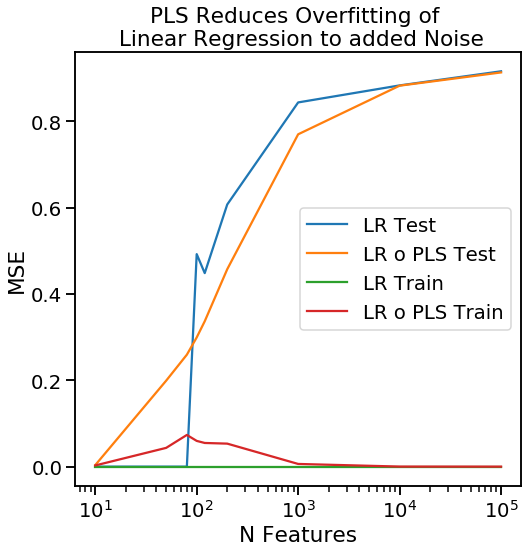

In [5]:
sns.set_context("talk", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(ms, glm_mse_test, label=f'LR Test')
ax.plot(ms, pls_mse_test, label=f'LR o PLS Test')
ax.plot(ms, glm_mse_train, label=f'LR Train')
ax.plot(ms, pls_mse_train, label=f'LR o PLS Train')
ax.legend()
plt.title('PLS Reduces Overfitting of \n Linear Regression to added Noise')
plt.xlabel('N Features')
plt.ylabel('MSE')
ax.set_xscale('log')
plt.show()